In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
np.random.seed(1)

### Submission guideline

- You should upload this jupyter notebook file
- Change the filename to your_student_id.ipynb (e.g., 20211234.ipynb)
- Any violation in the submission format may bring 5% penalty.

### About this assignment

- To successfully complete this assignment, you need a basic understanding about numpy library (I assume that everyone is familiar with Python at least). If you haven't used it before, please go and check the following online tutorial provided by Stanford CS231N class (this is not mandatory, you may find a better one):

  - https://cs231n.github.io/python-numpy-tutorial/#numpy

- The assignment consists of simple implementation questions. Each question only requires implementing a couple of lines of codes. If your implementation goes more than 10 lines, please check it again.

# CSED490B Assignment 3 - Linear Regression

For the first part of this assignment, we will implement a simple linear regression model where the input and output are a single number. In other words, our model is
$$ y = \theta x $$
where $x, y \in \mathbb{R}$ and $\theta \in \mathbb{R}$ is the model parameter.

We will load the dataset from the provided files. These files can be divided into training and validation datasets. Please take a look the loaded variables carefully.

In [2]:
#Do not modify this code block
X_train = np.load('X_train.npy')
Y_train = np.load('Y_train.npy')
X_val = np.load('X_val.npy')
Y_val = np.load('Y_val.npy')
print(X_train.shape)
print(Y_train.shape)

(8,)
(8,)


As you can see, the train set contains 8 input and output pairs. Now we will define some utility functions to plot the predicted results.

In [3]:
#Do not modify this code block
def plot_progress(X, Y, X_val, Y_val, thetas):
    n = len(thetas)
    plt.plot(X, Y, 'ro', markersize=6, label='data')
    plt.plot(X_val, Y_val, 'b+', markersize=6, label='val')        
    color = cm.rainbow(np.linspace(0, 1, n))
    for i, c in zip(range(n), color):
        plt.plot(np.linspace(0, 10, 100), np.linspace(0, 10, 100).dot(thetas[i]), c=c, label=i)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

### Loss(Objective) function: Mean squared error
In this assignment, we will use mean squared error to measure the performance of the prediction model. The mean squared error can be computed as follows:
$$ \mathcal{L} = \frac{1}{N}\sum_{n=1}^{N} (y_n - \hat{y_n})^2, $$
where $\hat{y_n}$ is the prediction result from the prediction model $f$, i.e., $\hat{y_n} = \theta x_n$.

### Question 1 (10pt)
Your first job is to implement the mean squared loss function. This function will take two input arguments: one for the ground truth values and the other for the predicted values.

In [4]:
def mse_loss(Y, Y_pred):
    """Return the mean squared error between `Y` and `Y_pred`
    
    Parameters
    ----------
    Y : array_like, ground truth values
    Y_pred : array_like, predicted values
    """
    
    loss = np.mean(np.square(np.subtract(Y, Y_pred)))
    return loss

We will train this linear model with the gradient descent algorithm. To update the model parameter $\theta$, we need to compute the gradient of the loss function w.r.t parameter $\theta$. 

For this assignment, we decided to use the chain rule to compute the gradient. The gradient can be rewritten as:

$$\frac{\partial{L}}{\partial{\theta}} = \frac{\partial{L}}{\partial{\hat{y}}} \frac{\partial{\hat{y}}}{\partial{\theta}},$$

where $\hat{y} \in \mathbb{R}^N$ and $\theta \in \mathbb{R}$.

### Question 2 (10pt)

We first decide to implement $\frac{\partial{L}}{\partial{\hat{y}}}$. `gradient_mse` function will get two inputs corresponding to the ground truth and predicted value and return $\frac{\partial{L}}{\partial{\hat{y}}}$. *Implement the missing part of the following function*:

In [5]:
def gradient_mse(Y, Y_pred):
    """Return gradient of mse loss w.r.t. the predicted value Y
    Note that the shape of the gradient is [1xN] (row-vector).
    
    Parameters
    ----------
    Y : array_like, ground truth values    
    Y_pred : array_like, predicted values
    """
    
    dLdy = np.transpose(np.subtract(Y, Y_pred) * -0.25)
    return dLdy

### Question 3 (20pt)
Let's implement $\frac{\partial{\hat{y}}}{\partial{\theta}}$. Note that the dimension of the returned value needs to be [Nx1] (or [N])

In [6]:
def gradient_parameter_simple(X, theta):
    """Return gradient of predicted value w.r.t the parameter theta

    Parameters
    ----------
    X : array_like, input dataset
    theta : array_like, current model parameters
    """
    
    return X

Now let's train our simple linear regression model. Run the following code and check the results. The plot shows how the linear line is fitted as we increase the number of iterations.

MSE train: 2.756553166187846  theta: 0.4999897316918109
MSE validation: 7.24003681203027
MSE train: 1.928020240353733  theta: 0.40920653643661187
MSE validation: 5.206600064416964
MSE train: 1.4270884806950785  theta: 0.33861707604067226
MSE validation: 3.8588484522543043
MSE train: 1.124224683722752  theta: 0.28372947371534596
MSE validation: 2.95198478714001
MSE train: 0.9411129569298646  theta: 0.2410510218313802
MSE validation: 2.332149403534253
MSE train: 0.8304034405589273  theta: 0.20786592760161324
MSE validation: 1.9017659399556965
MSE train: 0.763468366384515  theta: 0.18206249682037112
MSE validation: 1.598299663173973
MSE train: 0.7229993597299931  theta: 0.1619987587013106
MSE validation: 1.38118946950727
MSE train: 0.6985317615416904  theta: 0.14639798100926477
MSE validation: 1.2237718058533806
MSE train: 0.6837386294489048  theta: 0.13426742671512812
MSE validation: 1.1082616712703022


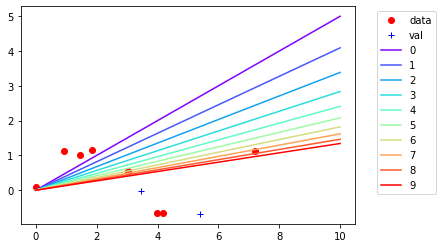

In [7]:
#Do not modify this code block
max_iteration = 100000
validation_step = int(max_iteration/10)
learning_rate = 1e-6
theta = 0.5    # initial parameter
hat_thetas = list()    # keep intermediate solutions

for i in range(max_iteration):
    Y_pred = theta * X_train   # prediction
    # gradient descent update step with the chain rule
    theta = theta - learning_rate * gradient_mse(Y_train, Y_pred).dot(gradient_parameter_simple(X_train, theta))  
    if i % validation_step == 0:
        hat_thetas.append(theta)
        print('MSE train:', mse_loss(Y_train,Y_pred), ' theta:', theta)
        print('MSE validation:', mse_loss(Y_val, theta * X_val))

plot_progress(X_train, Y_train, X_val, Y_val, hat_thetas)

## Polynomial regression

As you can see from the previous results, linear regression with non linear data cannot predict the unseen dataset correctly. To increase the flexibility of linear model, we decide to use more expressive feature function. To be specific, we will use polynomial feature function discussed in the lecture.

### Question 4: Polynomial feature function (10pt)
Your first job for the second part of the assignment is to implement the polynomial feature function. `poly_feature` function will take two inputs: `X` and `k` and trainsform the input dataset `X` to fit `k`th order polynomial function. Specifically, let $\phi$ be a transformation function, then

$$\phi(x_n, k) = [x_n^0, x_n^1, ..., x_n^k]^\top$$

With the polynomial feature function, now we can predict the output with $k$order polynomial function as:

$$y_n = \theta_0x_n^0 + \theta_1 x_n^1 + \theta_2 x_n^2 + ... + \theta_k x_n^k$$

Fill the missing part of the following code.

In [8]:
def poly_feature(X, k):
    """Return transformed input with polynomial feature function of order `k`.
    ex) if k is 3 then, [x^0, x^1, x^2, x^3] is the transformed feature of input x.
    Hence, the dimensions of output variable are [Nx(K+1)].    
    
    Parameters
    ----------    
    X : array_like, inputs. we assume that the input X is a column vector [Nx1]
    k : int, order of polynomial feature
    """
    
    ret = np.ones_like(X)
    for i in range(1, k+1):
        arr = X ** i
        ret = np.c_[ret, arr]
    return ret

To trian the model with $K$th order polynomial feature function, we can use the same chain rule used to trian the simple linear model. Let $\Phi$ be a transformed input dataset $X$, then the gradient of the model w.r.t the parameter vector is

$$\frac{\partial{L}}{\partial{\theta}} = \frac{\partial{L}}{\partial{\hat{y}}} \frac{\partial{\hat{y}}}{\partial{\theta}},$$

where $\theta \in \mathbb{R}^{K+1}$.

The gradient corresponding to the first term on the right hand side, i.e., $\frac{\partial{L}}{\partial{\hat{y}}}$ is the same as the one with the simple linear regression. Therefore, we only need to reimplement $\frac{\partial{\hat{y}}}{\partial{\theta}}$ since now the $\theta$ is $K+1$ dimensional vector.

### Question 5 (10pt)
Let's implement a function that computes $\frac{\partial{\hat{y}}}{\partial{\theta}}$. The function takes two variables `Phi` $\in \mathbb{R}^{N x (K+1)}, which is the transformed dataset, and `theta`. Please complete the following function.

In [9]:
def gradient_parameter_poly(Phi, theta):
    """Return the Jacobian of predicted value w.r.t the parameter theta.
    The dimension of Jacobian is [Nx(K+1)].

    Parameters
    ----------
    Phi : array_like, transformed input dataset. [Nx(K+1)] for this assignment.
    theta : array_like, current model parameters
    """
    
    return Phi

Before train the model, let's define some useful tool to visualize the results. Note that you need to implement `poly_feature` first.

In [10]:
#Do not modify this code block
def plot_progress_poly(X, Y, X_val, Y_val, thetas, k):
    """This will plot the train and validation sets with the fitted curves.
    """
    n = len(thetas)
    plt.plot(X, Y, 'ro', markersize=6, label='train')
    plt.plot(X_val, Y_val, 'b+', markersize=6, label='val')
    x_max = np.max(X)
    
    color = cm.rainbow(np.linspace(0, 1, n))
    for i, c in zip(range(n), color):
        plt.plot(np.linspace(0, x_max+0.1, 100), poly_feature(np.linspace(0, x_max+0.1, 100), k).dot(thetas[i]), c=c, label=i)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

Now let's train the model (this will take some amount of time!)

MSE train: 0.7672763476971323
MSE validation: 0.23269127922112268
MSE train: 0.5479327855915566
MSE validation: 0.7056378037991449
MSE train: 0.4991853068415214
MSE validation: 0.6365778606072927
MSE train: 0.47220289963998063
MSE validation: 0.5853811144579892
MSE train: 0.45726001513718517
MSE validation: 0.5491146954124435
MSE train: 0.4489846254177977
MSE validation: 0.5231815473586897
MSE train: 0.44440170335578055
MSE validation: 0.5044681754582493
MSE train: 0.4418636748956415
MSE validation: 0.4908663717429199
MSE train: 0.44045811128855417
MSE validation: 0.4809237926829988
MSE train: 0.4396797082546286
MSE validation: 0.4736241972262844


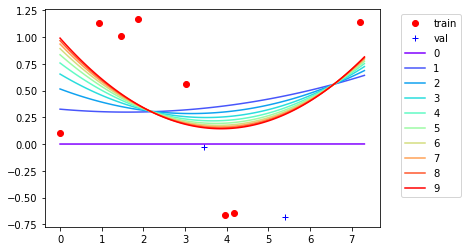

In [11]:
#Do not modify this code block
k=2
max_iteration = 10000000
validation_step = int(max_iteration/10)
learning_rate = 1e-6
theta = np.zeros(k+1)
hat_thetas = list()

Phi_train = poly_feature(X_train, k)

for i in range(max_iteration):
    Y_pred = Phi_train.dot(theta)   # predict
    theta = theta - learning_rate * gradient_mse(Y_train, Y_pred).dot(gradient_parameter_poly(Phi_train, theta))
    if i % validation_step == 0:
        hat_thetas.append(theta)
        print('MSE train:', mse_loss(Y_train,Y_pred))
        print('MSE validation:', mse_loss(Y_val, poly_feature(X_val, k).dot(theta)))
        
plot_progress_poly(X_train, Y_train, X_val, Y_val, hat_thetas, k)

It's time to increase the order of the polynomial function. Let's do it with `k=3`.

MSE train: 0.7672763476971323
MSE validation: 0.2426122210946232
MSE train: 0.2106901444044319
MSE validation: 0.08403567861048834
MSE train: 0.11750514768154821
MSE validation: 0.012767810906087506
MSE train: 0.08919793745782931
MSE validation: 0.0020006445881954704
MSE train: 0.07453750235061743
MSE validation: 0.003376712593532606
MSE train: 0.06398067170026212
MSE validation: 0.007246035668474896
MSE train: 0.055528609715581816
MSE validation: 0.011689303779318566
MSE train: 0.048586288291200645
MSE validation: 0.01632734824117111
MSE train: 0.04285148940296392
MSE validation: 0.021062728231754476
MSE train: 0.03810829548440192
MSE validation: 0.025835701572475757


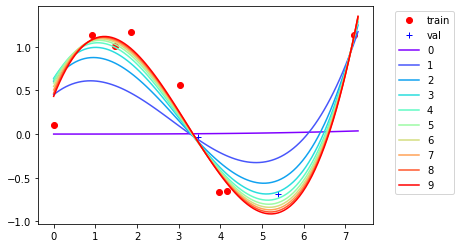

In [12]:
#Do not modify this code block
k=3
max_iteration = 10000000
validation_step = int(max_iteration/10)
learning_rate = 1e-6
theta = np.zeros(k+1)
hat_thetas = list()

Phi_train = poly_feature(X_train, k)

for i in range(max_iteration):
    Y_pred = Phi_train.dot(theta)
    theta = theta - learning_rate * gradient_mse(Y_train, Y_pred).dot(gradient_parameter_poly(Phi_train, theta))
    if i % validation_step == 0:
        hat_thetas.append(theta)
        print('MSE train:', mse_loss(Y_train,Y_pred))
        print('MSE validation:', mse_loss(Y_val, poly_feature(X_val, k).dot(theta)))
        
plot_progress_poly(X_train, Y_train, X_val, Y_val, hat_thetas, k)

How are your training and validation error changed? Think about results. (You don't need to answer)

## Linear regression with regularizer

During the linear model lecture, we studied how we can obtain the optimal parameter by computing the first order stationary point.

### Question 6 (20pt)
Now, we directly compute the optimal parameter with the least square method. Implement the following functions (you are not allowed to use the functions that directly solve the least square method such as `np.linalg.lstsq`):

In [13]:
def least_square_solution(Phi, Y):
    """Return least square solution from input dataset `Phi` and output `Y`

    Parameters
    ----------
    Phi : array_like, transformed input dataset
    Y: array_like, ground truth values
    """
    
    moore_penrose = np.dot(np.linalg.inv(np.dot(np.transpose(Phi), Phi)), np.transpose(Phi))
    return np.dot(moore_penrose, Y)

Compute the solution with 7th order polynomial regression. Check the train and validation errors.

MSE train: 3.465458895614062e-11
MSE validation: 5.287080552726932


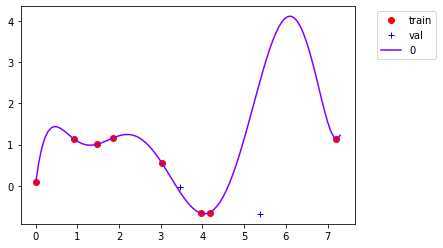

In [14]:
#Do not modify this code block
k=7
Phi = poly_feature(X_train, k)
theta = least_square_solution(Phi, Y_train)
plot_progress_poly(X_train, Y_train, X_val, Y_val, [theta], k)
print('MSE train:', mse_loss(Y_train, poly_feature(X_train, k).dot(theta)))
print('MSE validation:', mse_loss(Y_val, poly_feature(X_val, k).dot(theta)))

### Side Question (You don't need to answer)
Compute the least square solution of the third order polynomial and compare the obtained parameter with the one you obtained by the gradient descent algorithm. How much are they different?

### Question 7 (10pt)

As we have seen in the previous experiment, the high order polynomial function can overfit training dataset if the number of data is less than the order of the polynomial function. To overcome this issue, we now add the regularization term. Specifically, we will find the model parameter that minimize the following objective:

$$ \mathcal{L} = \frac{1}{2}\|Y - \Phi \theta||^2  +  \frac{\lambda}{2} \| \theta \|^2 $$

This approach is called a ridge regression in the lecture. Now, your goal is to implement the ridge regression solver, which returns the parameter that minimizes the above objective. Complete the following function:

In [15]:
def ridge_regression(Phi, Y, _lambda):
    """Return ridge regression solution from input dataset `Phi`, output `Y`, and hyper parameter `_lambda`.

    Parameters
    ----------
    Phi : array_like, transformed input dataset
    Y: array_like, ground truth values
    _lambda: float, regularization hyperparameter
    """
    
    process = np.linalg.inv(_lambda*np.eye(8) + np.dot(np.transpose(Phi), Phi))
    return np.dot(np.dot(process, np.transpose(Phi)), Y)

MSE train: 0.5190075946475835
MSE validation: 0.6272230523659109


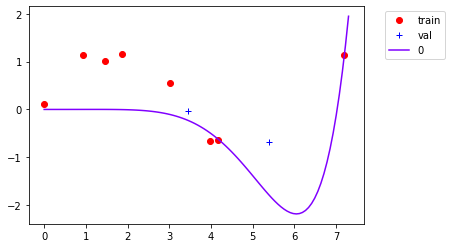

In [16]:
#Do not modify this code block
k=7
_lambda = 100000
Phi = poly_feature(X_train, k)
theta = ridge_regression(Phi, Y_train, _lambda)
plot_progress_poly(X_train, Y_train, X_val, Y_val, [theta], k)
print('MSE train:', mse_loss(Y_train, poly_feature(X_train, k).dot(theta)))
print('MSE validation:', mse_loss(Y_val, poly_feature(X_val, k).dot(theta)))

How are the training and validation error changed? Does it match to your intuition? (You don't need to answer)

## Question8 (10pt): Bayesian Linear Regression

- This is an extra question. Your total score will not exceed 100.

Note that the least square method and ridge regression cannot estimate the predicted uncertainty. To measure the uncertainty of the prediction, we need to employ the Bayesian inference framework. For this task, we will assume the following generative process:

$$ p(\theta) = \mathcal{N}(0, \sigma_1^2 I) $$
$$ p(y|\theta, \phi(x)) = \mathcal{N}(\theta^\top \phi(x), \sigma_2^2) $$

where $\phi{x} \in \mathcal{R}^{k+1}$ again.

Using the predictive distribution on new input data $x_\text{new}$ below,
$$ p(y_\text{new} | X, Y, \phi(x_\text{new})) = \int p(y_\text{new} | \theta, \phi(x_\text{new}) ) p(\theta | X, Y) d\theta $$
complete the following method. You must return the predicted mean and variance.

In [17]:
def bayesian_inference_prediction(Phi, Y, phi_new, sigma_1, sigma_2):
    """ Predict the mean and variance of y_new given input phi_new via Bayesian inference.

    Parameters
    ----------
    Phi: feature transformed input datset
    Y: ground truth values for the input datset
    phi_new: phi(x_new)
    sigma_1: the variance in the prior of theta (see the equation above)
    sigma_2: the variance in the likelihood (see the equation above)
    """
    
    S0 = (sigma_1**2)*np.eye(8)
    m0 = 0
    SN = np.linalg.inv(np.linalg.inv(S0) + (sigma_2**(-2))*np.dot(np.transpose(Phi), Phi))
    mN = np.dot(SN, ((sigma_2**(-2))*np.dot(np.transpose(Phi), Y)))
    mean = np.dot(np.transpose(mN), phi_new)
    variance = np.dot(np.dot(np.transpose(phi_new), SN), phi_new) + sigma_2**2
    
    return mean, variance

(-2.0, 2.0)

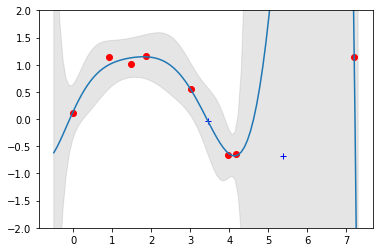

In [18]:
#Do not modify this code block

k=7
Phi = poly_feature(X_train, k)
sigma_1 = 5
sigma_2 = 0.5

plt.plot(X_train, Y_train, 'ro', markersize=6, label='train')
plt.plot(X_val, Y_val, 'b+', markersize=6, label='val')
x_max = np.max(X_train)

tmpX = np.linspace(-0.5, x_max+0.1, 100)  # temporal inputs for prediction
tmpPhi = poly_feature(tmpX, k)            # transformed temporal inputs
tmpY = np.zeros(tmpX.shape)               # to keep the predicted value
tmpVar = np.zeros(tmpX.shape)

for i, (_x, _phi) in enumerate(zip(tmpX, tmpPhi)):
    mean, variance = bayesian_inference_prediction(Phi, Y_train, _phi, sigma_1, sigma_2)
    tmpY[i] = mean
    tmpVar[i] = variance

plt.plot(tmpX, tmpY)
plt.fill_between(tmpX, tmpY - tmpVar, tmpY + tmpVar, color='gray', alpha=0.2)
plt.ylim(-2, 2)

Your results should look something like this:
![bi.png](bi.png)

- This is the end of the assignment. Great job & well done!
- If you find this assingment interesting, try to run the code with different configurations (learning rate, maximum number of iterations, etc...)